In [6]:
import numpy as np
import matplotlib.pyplot as pl
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [7]:
X = np.load("digit_data/X.npy")
y = np.load("digit_data/y.npy")
X = X[0:1000]
y = y[0:1000]
print(X.shape)
print(X[0])

(1000, 400)
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e

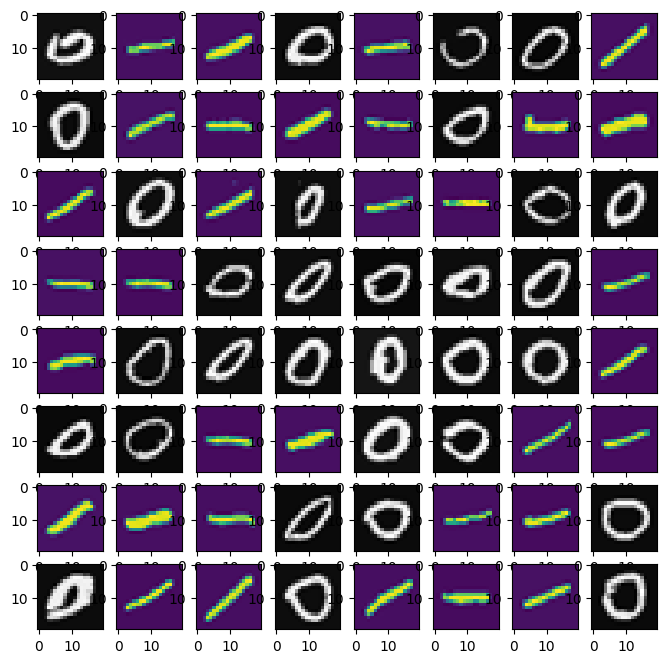

In [42]:
fig,ax = pl.subplots(8,8,figsize=(8,8))
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        r = random.randint(1,1000)
        if y[r] == 1:
            ax[i][j].imshow(X[r].reshape(20,20))
        else:
            ax[i][j].imshow(X[r].reshape(20,20),cmap = 'gray')

# fig.show()
# want ones look like

In [9]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(units = 100,activation = 'sigmoid'),
        Dense(units = 50,activation = 'sigmoid'),
        Dense(units = 10,activation = 'sigmoid'),
        Dense(units = 5,activation = 'sigmoid'),
        Dense(units = 1,activation = 'sigmoid'),
    ],name = "my_model"
)


In [10]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               40100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 45,721
Trainable params: 45,721
Non-trainable params: 0
_________________________________________________________________


In [21]:
print(model.layers[0].weights[0].shape)
print(model.layers[0].weights[0])


(400, 100)
<tf.Variable 'dense/kernel:0' shape=(400, 100) dtype=float32, numpy=
array([[-0.04112805, -0.08007186,  0.00427253, ...,  0.10040709,
        -0.08174384,  0.01379197],
       [ 0.08792657,  0.01736515,  0.05701888, ...,  0.01459911,
         0.01051086, -0.03424496],
       [ 0.0068359 ,  0.10807522, -0.01979906, ...,  0.09607952,
         0.08753745,  0.01985686],
       ...,
       [ 0.07362027, -0.07792004, -0.08595076, ...,  0.08605366,
         0.08757675,  0.02090461],
       [-0.04184365,  0.00985038, -0.08026492, ...,  0.02263502,
        -0.07704289, -0.1062838 ],
       [ 0.01630551, -0.08967383, -0.01173846, ...,  0.04142835,
        -0.0751798 , -0.01565871]], dtype=float32)>


In [22]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 1s 1ms/step - loss: 0.6756
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.5900
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4988
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4445
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4033
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.3675
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.3357
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.3068
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2814
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2589
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2389
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2211
Epoch 13/20
32/32 [==============================

In [43]:
X.shape
# print(X[0])

(1000, 400)

In [48]:
def pre(num):
    return 1 if num[0][0]>0.5 else 0
print(pre(model.predict(X[0].reshape(1,400))))
print(pre(model.predict(X[500].reshape(1,400))))

1/1 [==============================] - 0s 13ms/step
0
1/1 [==============================] - 0s 13ms/step
1


1/1 [==============================] - 0s 14ms/step


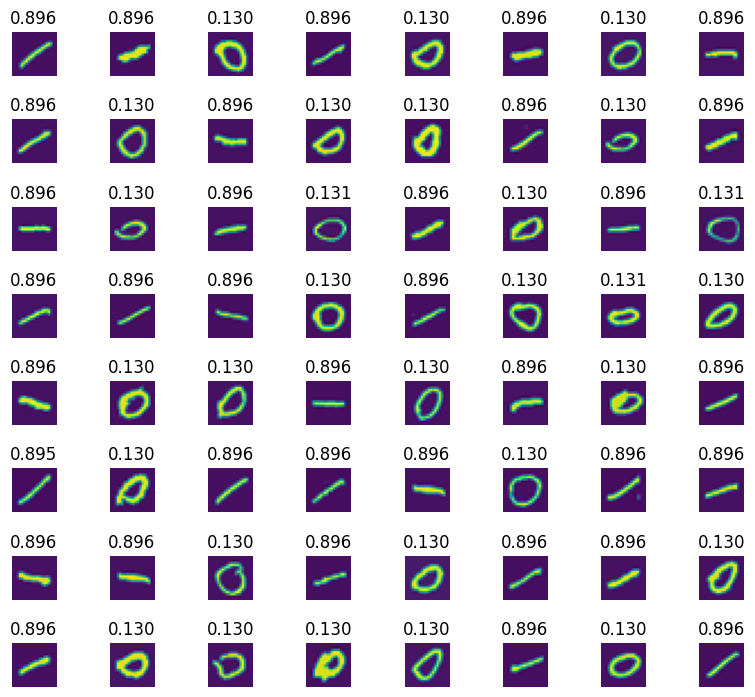

In [71]:
fig,ax = pl.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=1,rect=[0, 0.03, 1, 0.92])
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        r = random.randint(1,1000)
        ax[i][j].set_title("%.3f"%(model.predict(X[r].reshape(1,400))[0][0]))
        ax[i][j].imshow(X[r].reshape(20,20))
        ax[i][j].set_axis_off()
        


In [ ]:
per_w, 